# Task 1: Adaline and Gradient Descent

The objective of this task is to train an Adaline (ADAptive LInear NEuron) model using gradient descent and analyze the impact of different learning rates. The model will be trained on the Iris dataset [1] (See [References](#references)), and the effects of feature scaling will also be examined to explore how scaling influences the performance and convergence of the model. 

The Iris dataset, a well-known dataset for classification, contains data on the physical characteristics of iris flowers. In this task, the main focus is to classify two species: *Iris Setosa* and *Iris Versicolor*.

---

## 1. Import Dependencies

First, the main Python libraries are imported for data processing, visualization and model implementation.

In [141]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Adaline class

The Adaline model is implemented using gradient descent. The following code defines the ```AdalineGB``` class, which contains the core methods for training the model, predicting class labels and calculating the net input for gradient descent updates. The class is based on the implementation provided by *Raschka* [2] (See [References](#references)).

In [142]:
class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## 3. Data Loading and Plotting

The Iris dataset is loaded in this part, and the features are extracted for the classification of the species. As the feature set, *Sepal length* and *Petal length* will be used. 

Right after, the scatter plot will show the distribution of the data points based on the two selected features.

In [143]:
# Reading the data
df = pd.read_csv('iris_data.csv', header=0)

# Setosa and Versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Sepal length and Petal length
X = df.iloc[0:100, [0,2]].values

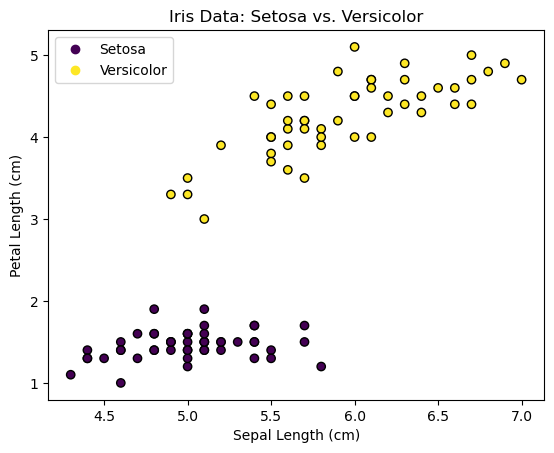

In [144]:
# Plot the data
scatter = plt.scatter(X[:,0], X[:,1],c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Iris Data: Setosa vs. Versicolor')

# Add the legend
legend_labels = ['Setosa', 'Versicolor']
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, loc='upper left')
plt.show()

## 4. Examine the Impact of Learning Rate

Gradient descent is sensitive to the choice of **learning rate**(```eta```). If it is too large, the algorithm may overshoot the optimal solution, while a very small learing rate may result in slow convergence. In this section, the Adaline model is trained with three different values of ```eta```:
$0.01$, $0.001$ and $0.0001$.

The cost (error) is plotted as a function of epochs to evaluate convergence.

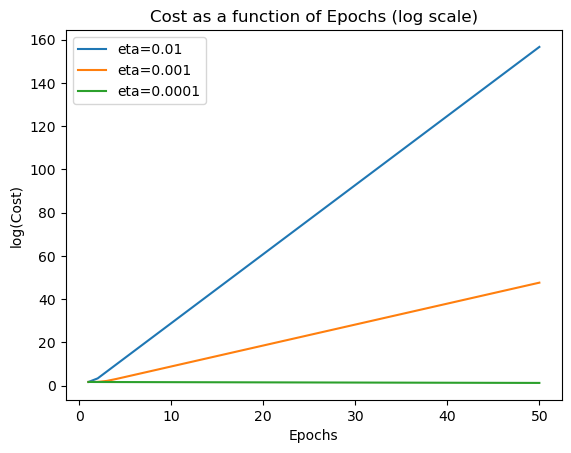

In [145]:
# Training Adaline with different learning rates
eta_values = [0.01, 0.001, 0.0001]
for eta in eta_values: # Looping inside the selected eta values
    adaline = AdalineGD(eta=eta, epochs=50)
    adaline.train(X, y)
    plt.plot(range(1, len(adaline.cost_) + 1), np.log10(adaline.cost_), label=f'eta={eta}')

# Plot the function
plt.xlabel('Epochs')
plt.ylabel('log(Cost)')
plt.legend()
plt.title('Cost as a function of Epochs (log scale)')
plt.show()

### Learning Rate Analysis

It's important to give an explanation of results:

- For ```eta = 0.01```, the algorithm converges relatively quickly, but may overshoot the optimal solution.

- For ```eta = 0.001```, convergence is slower, but the gradient descent is more stable than the previous eta's value.

- With ```eta = 0.0001```, the model converges very slowly, and more epochs are required in order to see a meaningful convergence. The model requires approximately $50$ epochs, but still does not reach full convergence within this limit.

### Further Analysis of Learning Rate

As previously explained, the learning rate can be very sensitive, because a very small change can lead to overshoot. For example, a learning rate between ```eta = 0.00045``` and ```eta = 0.0005``` can result in quicker convergence without significant overshoot, meaning that it could be sensitive to slight changes. A visualization is given in the following code.

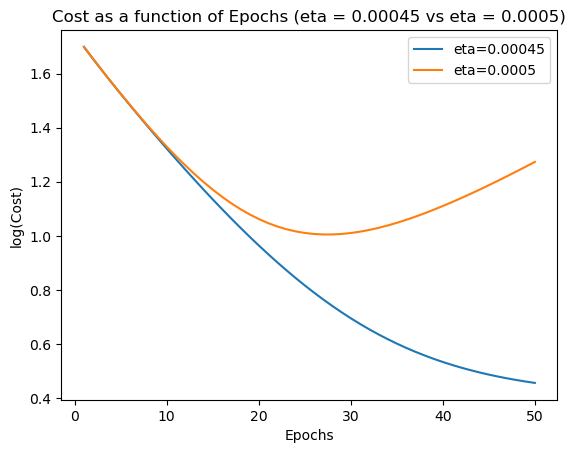

In [146]:
# Further analysis of learning rates between eta=0.00045 and eta=0.0005
eta_values = [0.00045, 0.0005]
for eta in eta_values:
    adaline = AdalineGD(eta=eta, epochs=50)
    adaline.train(X, y)
    plt.plot(range(1, len(adaline.cost_) + 1), np.log10(adaline.cost_), label=f'eta={eta}')

plt.xlabel('Epochs')
plt.ylabel('log(Cost)')
plt.legend()
plt.title('Cost as a function of Epochs (eta = 0.00045 vs eta = 0.0005)')
plt.show()

## 5. Feature Scaling

Feature scaling is implemented to standardize the feature values to have a mean of 0 and a standard deviation of 1. This reduces the sensitivity of the model to the learning rate and improves convergence speed. The standardized features are given by:

$$ x_{j,std} = \frac{x_j - \mu_j}{\sigma_j} $$

where $\mu_j$ is the mean, and $\sigma_j$ is the standard feature $x_j$.

### a. Applying Feature Scaling 

In [147]:
# Feature Scaling
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Train Adaline with scaled data
adaline = AdalineGD(eta=0.01, epochs=50)
adaline.train(X_std, y)

### b. Printing and Plotting of the residual cost in each iteration

The residual costs for each epoch after feature scaling are displayed in the output below. This shows how the cost decreases over time during the gradient descent optimization process.

Residual costs in each iteration after scaling:
Epoch 1: Cost = 50.0
Epoch 2: Cost = 33.82690621665535
Epoch 3: Cost = 23.15304865175933
Epoch 4: Cost = 16.108556308988383
Epoch 5: Cost = 11.459358765771782
Epoch 6: Cost = 8.39099886925878
Epoch 7: Cost = 6.365954253061313
Epoch 8: Cost = 5.0294729288689775
Epoch 9: Cost = 4.1474270146071435
Epoch 10: Cost = 3.565297671844978
Epoch 11: Cost = 3.1811061391532727
Epoch 12: Cost = 2.927548857378686
Epoch 13: Cost = 2.7602070768597784
Epoch 14: Cost = 2.6497654783726454
Epoch 15: Cost = 2.5768766478691654
Epoch 16: Cost = 2.5287717518431996
Epoch 17: Cost = 2.49702366361508
Epoch 18: Cost = 2.476070679835706
Epoch 19: Cost = 2.4622422084611744
Epoch 20: Cost = 2.453115745969254
Epoch 21: Cost = 2.4470924976028567
Epoch 22: Cost = 2.4431172968155384
Epoch 23: Cost = 2.4404937587612805
Epoch 24: Cost = 2.43876228599037
Epoch 25: Cost = 2.4376195551077227
Epoch 26: Cost = 2.4368653798806577
Epoch 27: Cost = 2.4363676421527685
Epoch 28: Cost =

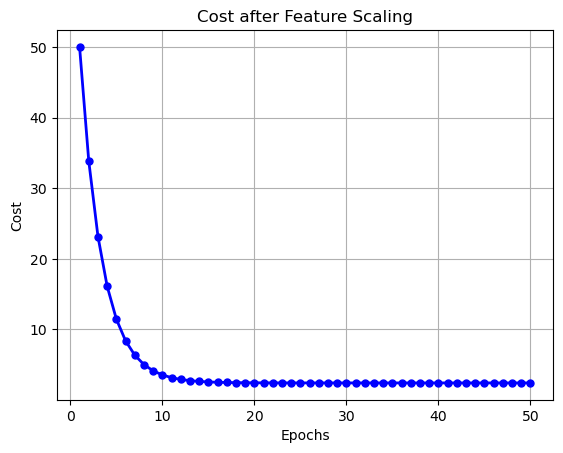

In [148]:
# Print the residual cost at each iteration
print("Residual costs in each iteration after scaling:")
for i, cost in enumerate(adaline.cost_, 1):
    print(f"Epoch {i}: Cost = {cost}")
    
# Plot residual cost
plt.plot(range(1, len(adaline.cost_) + 1), adaline.cost_, marker='o', linestyle='-', color='blue', linewidth=2, markersize=5)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost after Feature Scaling')
plt.grid(True) # For better readability
plt.show()

### c. Comparison to before feature scaling

The feature scaling results in much faster convergence compared to the unscaled data. The model now converges in fewer epochs, highlighting the importance of scaling in improving the performance of gradient descent.

### d. Plot the decision boundary

To visualize the decision boundary, random inputs are generated, and the Adaline model is used to classify them. This visualization helps illustrate the separation between the two classes after feature scaling.

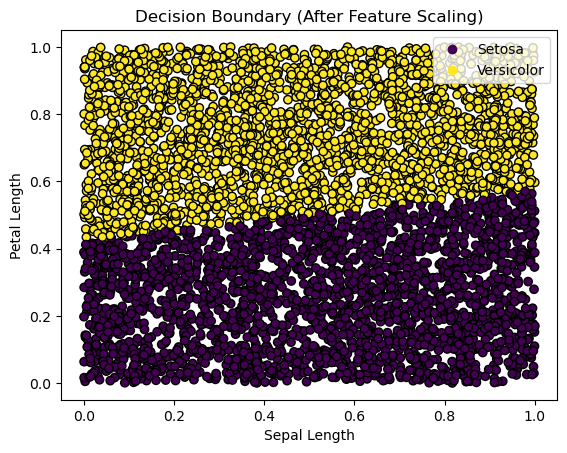

In [150]:
# Generate random inputs
X_new = np.random.rand(5000, 2)
X_new_std = (X_new - np.mean(X_new, axis=0)) / np.std(X_new, axis=0)
y_pred = adaline.predict(X_new_std)

# Plot decision boundary
new_scatter = plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred, cmap='viridis', edgecolors='k')
plt.title('Decision Boundary (After Feature Scaling)')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add the legend
legend_labels = ['Setosa', 'Versicolor']
handles, _ = new_scatter.legend_elements()
plt.legend(handles, legend_labels, loc='upper right')
plt.show()


## 6. Calculating Accuracy

After the implementation of feature scaling, the accuracy of the model can be calculated to assess the model's performance before and after scaling. The accuracy metric is useful to evaluate the classifier's ability to correctly predict the classes.

In [151]:
# Function to calculate the accuracy of the model
def calculate_accuracy(model, X, y):
    predictions = model.predict(X)
    accuracy = np.mean(predictions == y) * 100
    return accuracy

# Calculating accuracy before and after scaling
accuracy_unscaled = calculate_accuracy(adaline, X, y)
accuracy_scaled = calculate_accuracy(adaline, X_std, y)

print(f"Accuracy before scaling: {accuracy_unscaled:.2f}%")
print(f"Accuracy after scaling: {accuracy_scaled:.2f}%")

Accuracy before scaling: 50.00%
Accuracy after scaling: 100.00%


### Explanation

- The accuracy before scaling represents how well the model performs on the unscaled data.

- The accuracy after scaling demonstrates the improvement achieved after applying feature scaling. This is expected because feature scaling improves the learning process and allows the model to find better weights for classification.

## 7. Conclusion

This task demonstrates the importance of learning rate in gradient descent and highlights how feature scaling can accelerate convergence. 

It was shown that the learning rate is a critical hyperparameter in gradient descent, as a poorly chosen value can lead to either slow convergence or overshooting of the optimal solution. Additionally, feature scaling was demonstrated to improve the speed of convergence in a significant way. The accuracy comparison before and after scaling confirms these findings:

- Accuracy before scaling: $50.00$%
- Accuracy after scaling: $100.00$%

These findings highlight the importance of tuning hyperparameters when training ML models.

---

## References

[1] R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. Link to the dataset [here](https://archive.ics.uci.edu/ml/datasets/iris).

[2] S. Raschka (2015). "Single-Layer Neural Networks and Gradient Descent". Retrieved from [https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html)